In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import datashader as ds
import datashader.transfer_functions as tf
import time
import warnings
warnings.filterwarnings('ignore')

In [17]:
url='D://Github-Time//Time-Series//Sarima//Electricity.csv'
df=pd.read_csv(url,sep=',')
df['DateTime']=pd.to_datetime(df['DateTime'])
df.head()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


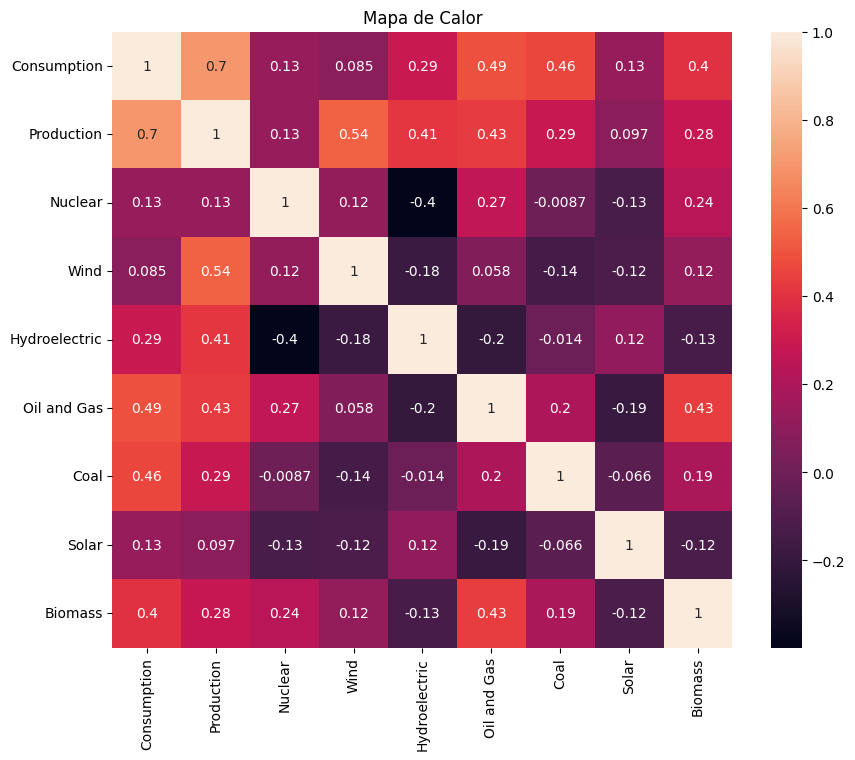

In [18]:
num=df.select_dtypes(include='number').columns
plt.figure(figsize=(10,8))
sns.heatmap(df[num].corr(),annot=True)
plt.title('Mapa de Calor')
plt.show()

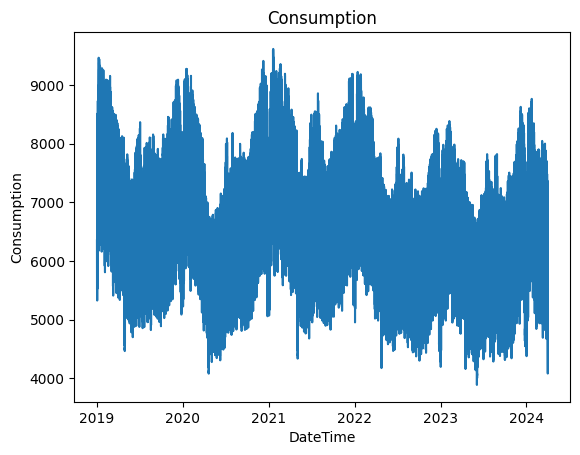

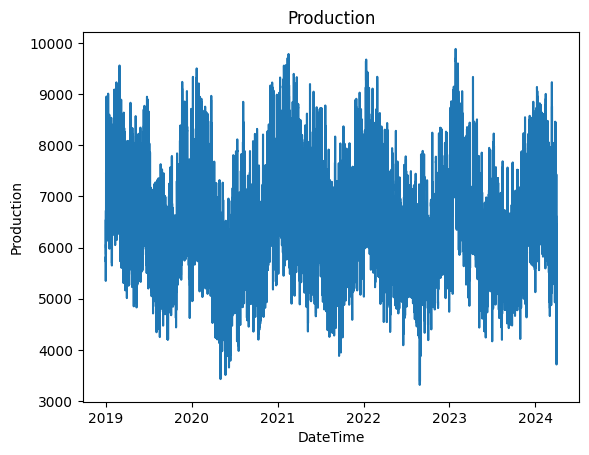

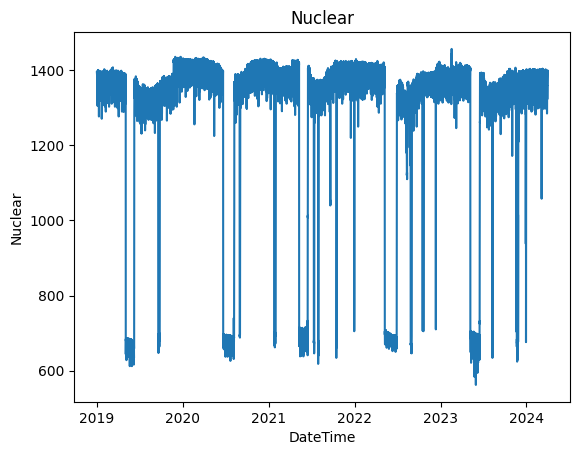

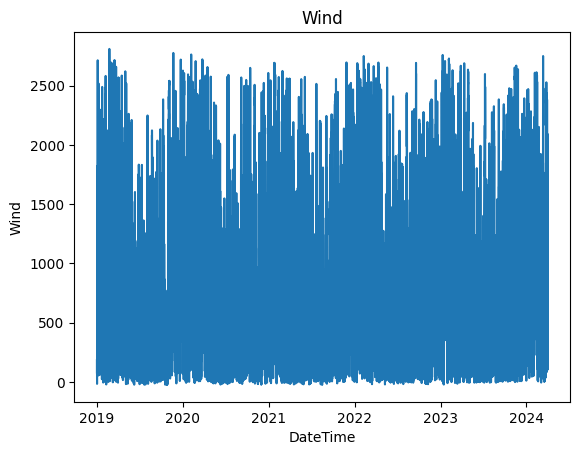

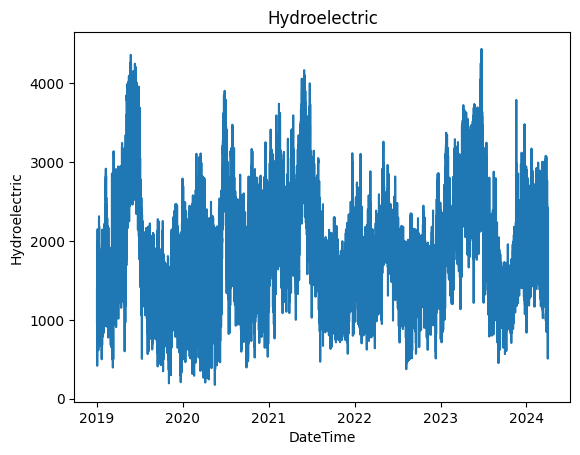

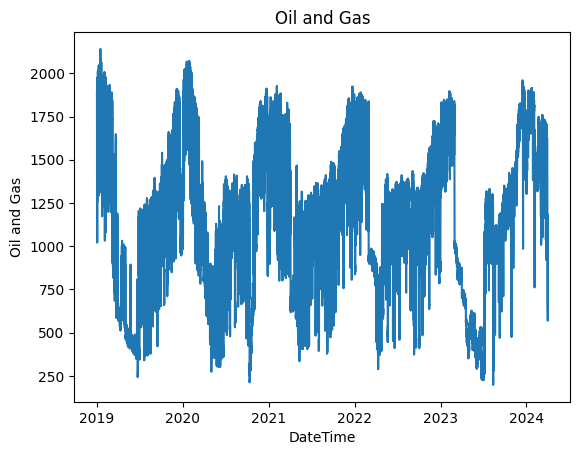

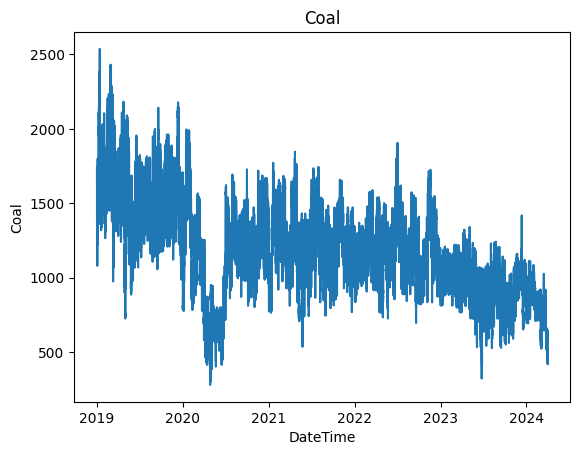

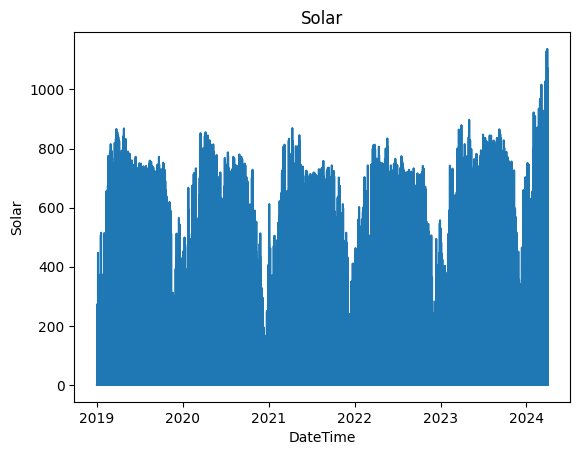

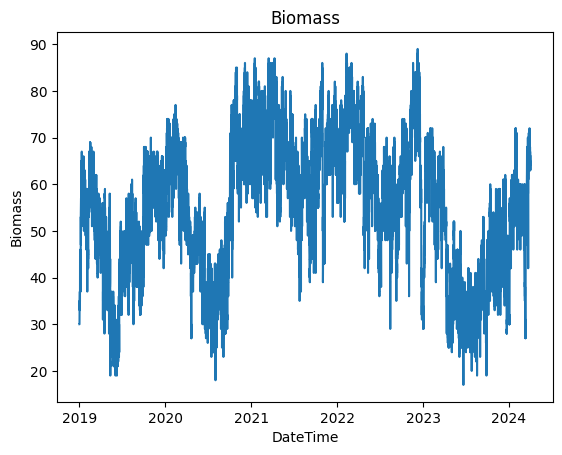

In [10]:
for i in num:
    sns.lineplot(data=df,x='DateTime',y=i)
    plt.title(i)
    plt.show()

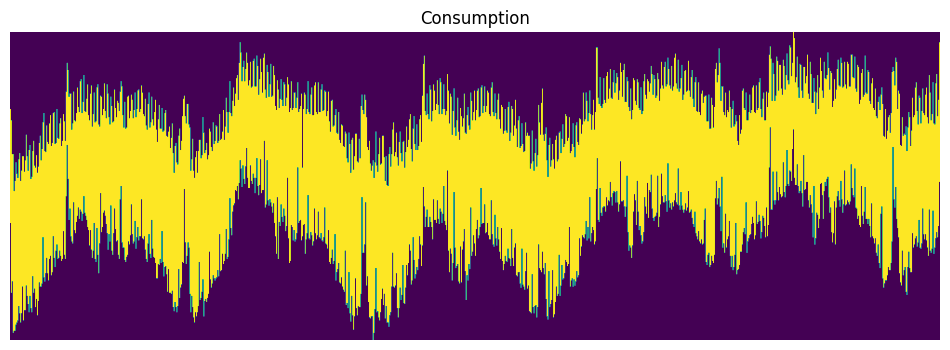

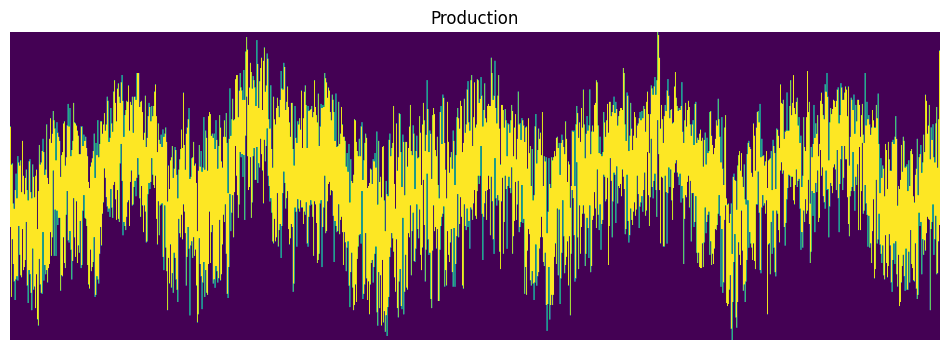

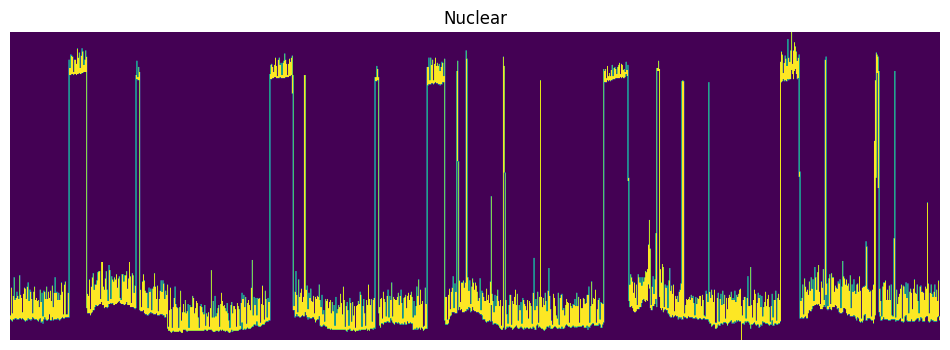

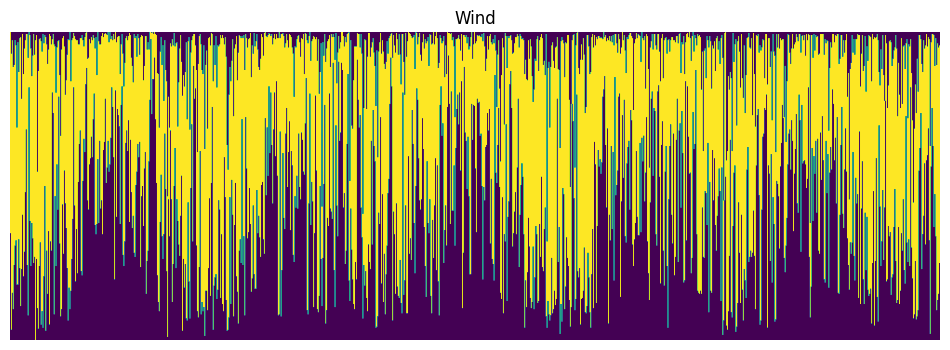

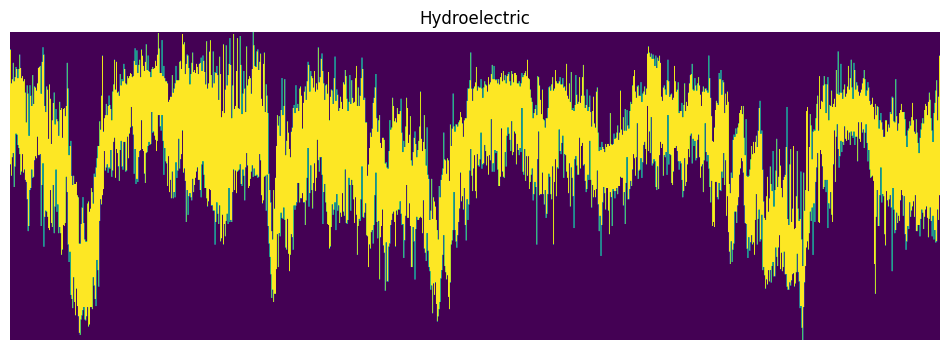

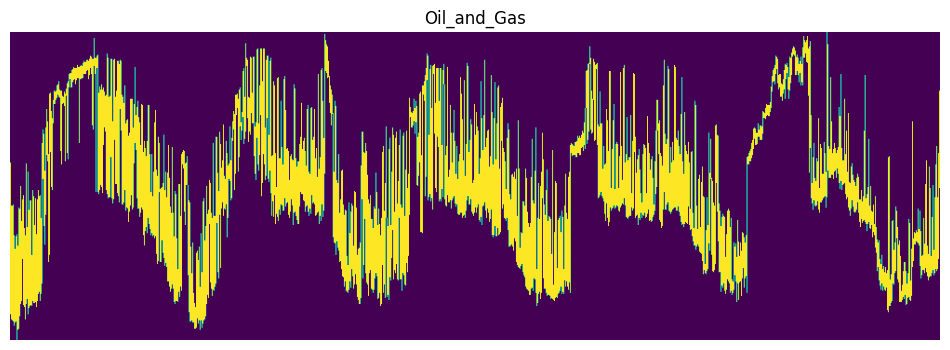

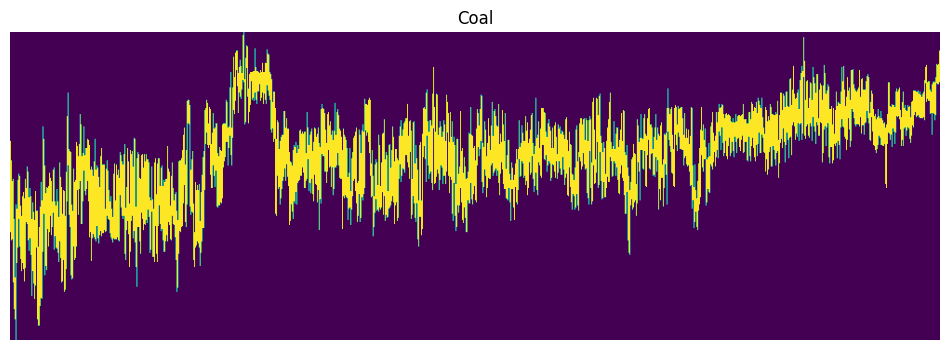

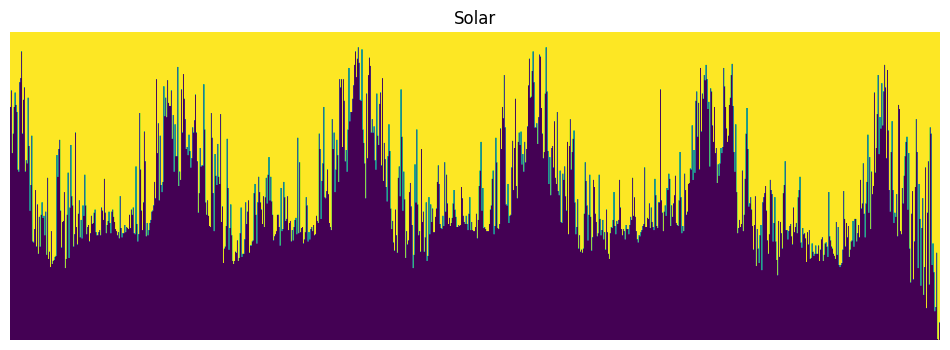

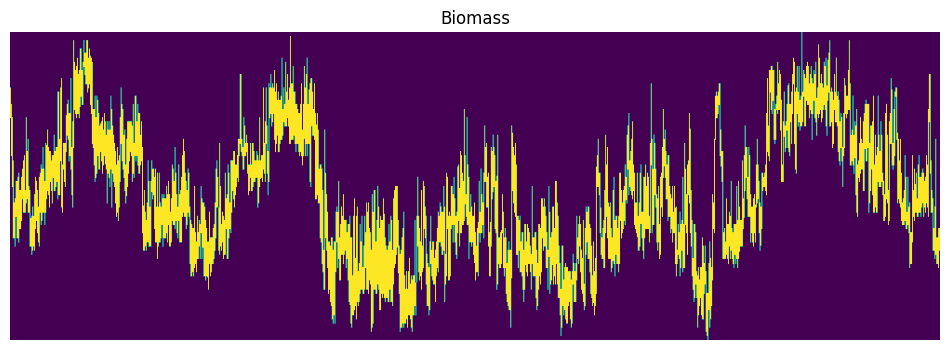

In [ ]:
# Asegurar nombres válidos
df.columns = df.columns.str.replace(' ', '_')
df['DateTime_numeric'] = df['DateTime'].astype('int64') / 1e9  # segundos UNIX

num = ['Consumption', 'Production', 'Nuclear', 'Wind',
       'Hydroelectric', 'Oil_and_Gas', 'Coal', 'Solar', 'Biomass']

for i in num:
    if not pd.api.types.is_numeric_dtype(df[i]):
        print(f"Columna {i} no es numérica, se omite.")
        continue

    cvs = ds.Canvas(plot_width=1000, plot_height=300,
                    x_range=(df['DateTime_numeric'].min(), df['DateTime_numeric'].max()))

    agg = cvs.line(df, x='DateTime_numeric', y=i)

    img = tf.shade(agg, cmap=["lightblue", "blue"], how='linear')

    plt.figure(figsize=(12, 4))
    plt.imshow(np.asarray(img), aspect='auto')
    plt.title(i)
    plt.axis('off')
    plt.show()


In [24]:
df

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil_and_Gas,Coal,Solar,Biomass,DateTime_numeric
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30,1.546301e+09
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30,1.546304e+09
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30,1.546308e+09
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30,1.546312e+09
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30,1.546315e+09
...,...,...,...,...,...,...,...,...,...,...,...
46006,2024-03-31 19:00:00,5618,5902,1398,505,2294,1012,620,6,65,1.711912e+09
46007,2024-03-31 20:00:00,6107,6205,1395,671,2389,1037,645,0,66,1.711915e+09
46008,2024-03-31 21:00:00,5991,5855,1395,868,2201,705,621,0,66,1.711919e+09
46009,2024-03-31 22:00:00,5527,5726,1393,908,2088,648,622,0,66,1.711922e+09
